In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
def sample_image(image, factor):
    height, width = image.shape[:2]
    sampled_image = cv2.resize(
        image,
        (width // factor, height // factor),
        interpolation=cv2.INTER_NEAREST
    )
    return sampled_image


def quantize_image(image, levels):
    step = 256 // levels
    quantized_image = np.floor(image / step) * step
    return quantized_image.astype(np.uint8)


def plot_images(original, sampled, quantized):
    plt.figure(figsize=(12,4))

    plt.subplot(1,3,1)
    plt.imshow(original, cmap='gray')
    plt.title("Original")
    plt.axis("off")

    plt.subplot(1,3,2)
    plt.imshow(sampled, cmap='gray')
    plt.title("Sampled")
    plt.axis("off")

    plt.subplot(1,3,3)
    plt.imshow(quantized, cmap='gray')
    plt.title("Quantized")
    plt.axis("off")

    plt.show()

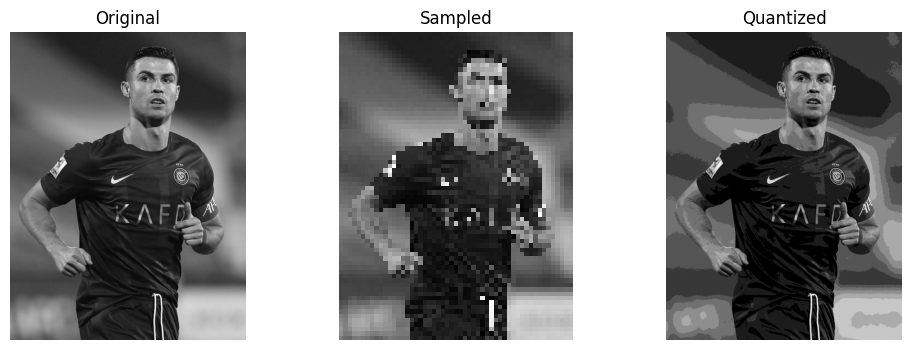

In [24]:
image_path = 'new_image.jpg'

sampling_factor = 15     # manipulate this
quantization_levels = 9  #manipulate this

original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if original_image is None:
    print("Image not found! Check the path.")
else:
    sampled_image = sample_image(original_image, sampling_factor)
    quantized_image = quantize_image(original_image, quantization_levels)
    plot_images(original_image, sampled_image, quantized_image)


In [6]:
from PIL import Image
img1 = Image.open("new_image.jpg").convert("L")
img2 = Image.open("Brad-Pitt-2.jpg").convert("L")

resize = (400, 400)
img1 = img1.resize(resize)
img2 = img2.resize(resize)

im1arr = np.array(img1)
im2arr = np.array(img2)


In [11]:
subtraction = np.clip(im1arr - im2arr, 0, 255)
Image.fromarray(subtraction.astype(np.uint8)).show()


In [12]:
addition_const = np.clip(im1arr + 175, 0, 255)
Image.fromarray(addition_const.astype(np.uint8)).show()


In [13]:
intersection = im1arr & im2arr
Image.fromarray(intersection).show()


In [14]:
union = im1arr | im2arr
Image.fromarray(union).show()


In [15]:
difference = im1arr & (~im2arr)
Image.fromarray(difference).show()


In [16]:
xor = im1arr ^ im2arr
Image.fromarray(xor).show()
